# Data preparation

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import re
import csv
from tqdm import tqdm

In [3]:
df = pd.read_csv('data/bd-recommendations.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20626 entries, 0 to 20625
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   titolo                    20626 non-null  object 
 1   autore                    19353 non-null  object 
 2   editore                   20626 non-null  object 
 3   isbn                      20626 non-null  int64  
 4   categoria                 20605 non-null  object 
 5   numero-pagine             19629 non-null  object 
 6   data-di-uscita            20626 non-null  object 
 7   raccomandazioni-ricevute  20515 non-null  float64
 8   consigliato-da            20515 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.4+ MB


In [5]:
df.head()

,titolo,autore,editore,isbn,categoria,numero-pagine,data-di-uscita,raccomandazioni-ricevute,consigliato-da
0,Cambiare l'acqua ai fiori,Perrin Valérie,E/O,9788833570990,Letterature straniere: testi,476,10/07/2019,64.0,"81/libreria-tasso, 60/a-tutto-libro, 55/libris..."
1,"Ragazza, donna, altro",Evaristo Bernardine,Sur,9788869982279,Letterature straniere: testi,520,11/11/2020,61.0,39/la-confraternita-delluva-libreria-indipende...
2,L'Ickabog,Rowling J. K.,Salani,9788831006705,Letteratura per ragazzi,320,10/11/2020,44.0,"168/magia-del-fumetto, 486/lotta-libreria, 306..."
3,Dante,Barbero Alessandro,Laterza,9788858141649,Letteratura italiana: critica,361,08/10/2020,37.0,"51/il-ponte-sulla-dora, 116/lettera22, 433/lib..."
4,Borgo Sud,Di Pietrantonio Donatella,Einaudi,9788806244781,Letteratura italiana: testi,168,03/11/2020,36.0,"285/libreria-fogola-pisa, 512/libreria-di-donn..."


In [6]:
df.isnull().sum()

titolo                         0
autore                      1273
editore                        0
isbn                           0
categoria                     21
numero-pagine                997
data-di-uscita                 0
raccomandazioni-ricevute     111
consigliato-da               111
dtype: int64

## Edge list

In [7]:
df.dropna(axis=0, subset=['raccomandazioni-ricevute','consigliato-da'], inplace=True)

In [8]:
# Convert str to list
df['consigliato-da'] = [bookdealer.split(', ') for bookdealer in df['consigliato-da']]

In [9]:
recommendations = [recommendation for recommendations in df['consigliato-da'] for recommendation in recommendations]
bookdealers = list(set(recommendations))


recommendations_by_bookdealer = dict()
for bookdealer in bookdealers:
    recommendations_by_bookdealer[bookdealer] = recommendations.count(bookdealer)

recommendations_by_bookdealer

{'686/libreria-universal-di-ama-salentea': 16,
 '457/libreria-bacco': 20,
 '133/dudi-libreria-per-bambini-e-ragazzi': 4,
 '300/gallery16': 8,
 '112/libreria-tralerighe': 21,
 '284/lento-bookshop': 28,
 '51/il-ponte-sulla-dora': 92,
 '900/il-segnalibro': 10,
 '421/marabuk': 25,
 '327/libreria-dei-piccoli-rimedi': 29,
 '64/skribi-parole-suoni-gusto': 91,
 '621/la-libreria-dei-ragazzi': 52,
 '887/polpo-ludo': 14,
 '352/lèggere-leggére': 67,
 '469/libreria-del-sole': 1,
 '109/libreria-101': 326,
 '114/bookstorie': 104,
 '465/le-altalene-libri': 68,
 '92/libreria-venpred': 32,
 '410/la-piccola-libreria-di-levico-terme': 235,
 '478/tuedio-design-di-marina-checchi': 22,
 '98/libreria-prosperi': 136,
 '194/mammachilegge': 4,
 '63/libreria-popolare-di-via-tadino': 102,
 '351/oh-che-bel-castello-libreria': 52,
 '426/edicola-aldini': 77,
 '347/libreria-miranfù-libri-per-bambini': 66,
 '85/la-bookeria': 27,
 '395/eco-di-fata': 82,
 '477/libreria-tamu': 1,
 '279/il-gatto-immaginario': 6,
 '637/libr

In [10]:
# Find books that are recommended by a bookdealer who made only that recommendation
rows2remove = [index for index, row in df.iterrows()
               if row['raccomandazioni-ricevute'] == 1
               and recommendations_by_bookdealer[row['consigliato-da'][0]]== 1]
print(len(rows2remove))

df.drop(index=rows2remove, inplace=True)

16


In [11]:
df['id'] = [i for i in range(0,len(df))]

In [12]:
len(df)

20499

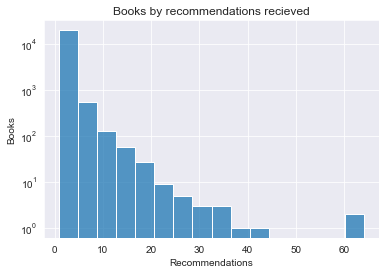

In [13]:
fig, ax = plt.subplots()
ax = sns.histplot(x ='raccomandazioni-ricevute', data = df)
ax.set_xlabel('Recommendations')
ax.set_ylabel('Books')
ax.set_title('Books by recommendations recieved')
ax.set_yscale('log')
plt.show()

In [14]:
df['raccomandazioni-ricevute'].value_counts()

1.0     15686
2.0      2683
3.0       929
4.0       408
5.0       249
6.0       139
7.0        97
8.0        70
9.0        44
10.0       34
11.0       28
12.0       24
13.0       18
15.0       16
14.0       14
16.0        9
18.0        9
17.0        7
19.0        7
23.0        5
20.0        4
26.0        3
21.0        2
24.0        2
25.0        2
29.0        2
61.0        1
32.0        1
33.0        1
35.0        1
36.0        1
37.0        1
44.0        1
64.0        1
Name: raccomandazioni-ricevute, dtype: int64

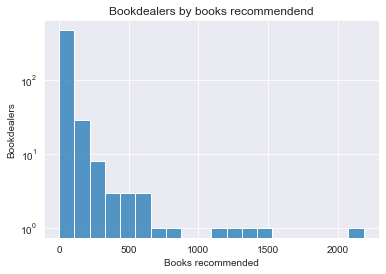

In [15]:
fig, ax = plt.subplots()
ax = sns.histplot([recommendations.count(bookdealer) for bookdealer in bookdealers], bins=20)
ax.set_xlabel('Books recommended')
ax.set_ylabel('Bookdealers')
ax.set_yscale('log')
ax.set_title('Bookdealers by books recommendend')
plt.show()

In [16]:
books = list(zip(df['id'],df['consigliato-da']))

In [17]:
def compute_b2m_weight(blue_node1, blue_node2, use_newman_method=None):
    """
    Compute weight between 2 nodes from a binary two-mode network
    (refer to https://toreopsahl.com/tnet/two-mode-networks/projection/).
    When using Newsman's method, a dictionary is needed containing
    "number of blue nodes connected to the red node".

    :param blue_node1: list of red nodes linked to node1
    :param blue_node2: list of red nodes linked to node2
    :param use_newman_method: dictionary in the form of blue_node[number_of_links]
    :type blue_node1: list
    :type blue_node2: list
    :type use_newman_method: dict

    :return: weight of the connection
    """

    intersection = [red_node for red_node in blue_node1 if red_node in blue_node2]
    if use_newman_method:
        n = use_newman_method
        w = sum(1/(n[red_node]-1) for red_node in intersection
                if n[red_node] and n[red_node]-1)
    else:
        w = sum(1 for red_node in intersection)
    return w

In [18]:
blue_node1_test = books[0][1]
blue_node2_test = books[1][1]

In [19]:
print(compute_b2m_weight(blue_node1_test, blue_node2_test))
print(compute_b2m_weight(blue_node1_test, blue_node2_test, recommendations_by_bookdealer))

7
0.045503931432693406


In [20]:
edges = list()
edges_newman = list()
for count, book_i in enumerate(books[:-1]):
    for book_j in books[count+1:]:
        weight = compute_b2m_weight(book_i[1], book_j[1])
        if weight:
            edges.append((book_i[0], book_j[0], weight))
        weight_newman = compute_b2m_weight(book_i[1], book_j[1],
            use_newman_method=recommendations_by_bookdealer)
        if weight_newman:
            edges_newman.append((book_i[0], book_j[0], weight_newman))

In [21]:
edges[:10]

[(0, 1, 7),
 (0, 2, 16),
 (0, 3, 12),
 (0, 4, 9),
 (0, 5, 11),
 (0, 6, 6),
 (0, 7, 7),
 (0, 8, 14),
 (0, 9, 1),
 (0, 10, 9)]

In [22]:
edges_newman[:10]

[(0, 1, 0.045503931432693406),
 (0, 2, 0.2940705690465103),
 (0, 3, 0.13992573728055546),
 (0, 4, 0.18052622830282716),
 (0, 5, 0.118968837562643),
 (0, 6, 0.07778880374954583),
 (0, 7, 0.049434951905991474),
 (0, 8, 0.16732270897504892),
 (0, 9, 0.0017271157167530224),
 (0, 10, 0.16593123257506606)]

In [23]:
len(edges)

8370175

In [24]:
len(edges_newman)

8370175

In [25]:
thresholds = list()
edges_w_threshold = list()
nodes_w_threshold = list()
density_w_threshold = list()


for i in range(0, 10):
    print(f'threshold: {i}')
    thresholds.append(i)
    # Compute number of edges
    l = sum(1 for edge in edges if edge[2] > i)
    print(f'edges: {l}')
    edges_w_threshold.append(l)
    # Compute number of nodes
    node_ids1 = [edge[0] for edge in edges if edge[2] > i]
    node_ids2 = [edge[1] for edge in edges if edge[2] > i]
    node_ids = list(set(node_ids1 + node_ids2))
    n = len(node_ids)
    nodes_w_threshold.append(n)
    print(f'nodes: {n}')
    # Compute number of possible edges
    l_max = (n * (n-1))/2
    print(f'possible eddges {l_max}')
    # Compute density
    d = l/l_max
    print(f'density {d}')
    print()
    density_w_threshold.append(d)

threshold: 0
edges: 8370175
nodes: 20499
possible eddges 210094251.0
density 0.0398400953865225

threshold: 1
edges: 90233
nodes: 4328
possible eddges 9363628.0
density 0.009636542587979788

threshold: 2
edges: 11702
nodes: 1407
possible eddges 989121.0
density 0.011830706253329977

threshold: 3
edges: 3491
nodes: 616
possible eddges 189420.0
density 0.018429944039700136

threshold: 4
edges: 1450
nodes: 344
possible eddges 58996.0
density 0.024577937487287274

threshold: 5
edges: 675
nodes: 207
possible eddges 21321.0
density 0.031658927817644573

threshold: 6
edges: 359
nodes: 137
possible eddges 9316.0
density 0.03853585229712323

threshold: 7
edges: 193
nodes: 92
possible eddges 4186.0
density 0.04610606784519828

threshold: 8
edges: 109
nodes: 64
possible eddges 2016.0
density 0.05406746031746032

threshold: 9
edges: 64
nodes: 45
possible eddges 990.0
density 0.06464646464646465



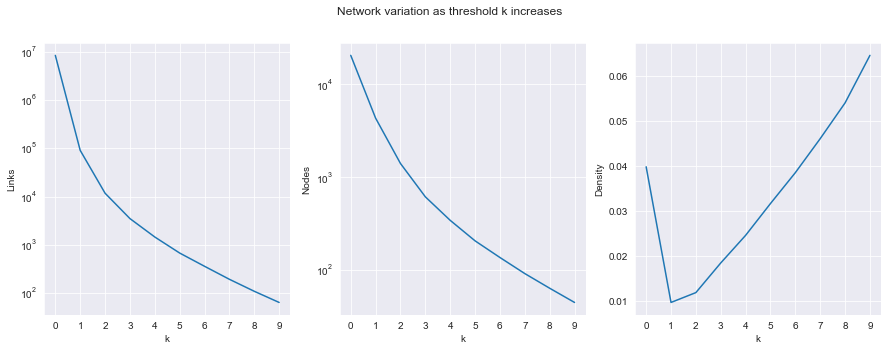

In [26]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.lineplot(ax=axes[0], x=thresholds, y=edges_w_threshold)
axes[0].set_xlabel('k')
axes[0].set_ylabel('Links')
axes[0].set_yscale('log')
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

sns.lineplot(ax=axes[1], x=thresholds, y=nodes_w_threshold)
axes[1].set_xlabel('k')
axes[1].set_ylabel('Nodes')
axes[1].set_yscale('log')
axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))

sns.lineplot(ax=axes[2], x=thresholds, y=density_w_threshold)
axes[2].set_xlabel('k')
axes[2].set_ylabel('Density')
axes[2].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.suptitle("Network variation as threshold k increases")
plt.show()

In [27]:
edges = edges_newman

thresholds = list()
edges_w_threshold = list()
nodes_w_threshold = list()
density_w_threshold = list()


for i in sorted(list(set([edge[2] for edge in edges]))):
    thresholds.append(i)
    # Compute number of edges
    l = sum(1 for edge in edges if edge[2] > i)
    edges_w_threshold.append(l)
    # Compute number of nodes
    node_ids1 = [edge[0] for edge in edges if edge[2] > i]
    node_ids2 = [edge[1] for edge in edges if edge[2] > i]
    node_ids = list(set(node_ids1 + node_ids2))
    n = len(node_ids)
    nodes_w_threshold.append(n)
    # Compute number of possible edges
    l_max = (n * (n-1))/2
    # Compute density
    d = l/l_max
    density_w_threshold.append(d)

    if l < 1000000:
        configuration = {'threshold':i, 'l': l, 'n': n,
                         'l_max': l_max, 'd': d}
        print(configuration)
        break

{'threshold': 0.002793296089385475, 'l': 989662, 'n': 11775, 'l_max': 69319425.0, 'd': 0.014276835100695079}


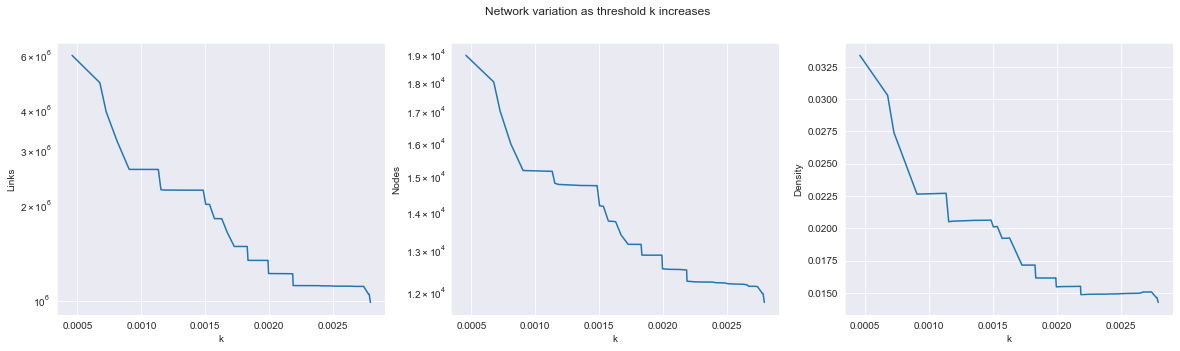

In [28]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))

sns.lineplot(ax=axes[0], x=thresholds, y=edges_w_threshold)
axes[0].set_xlabel('k')
axes[0].set_ylabel('Links')
axes[0].set_yscale('log')
#axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

sns.lineplot(ax=axes[1], x=thresholds, y=nodes_w_threshold)
axes[1].set_xlabel('k')
axes[1].set_ylabel('Nodes')
axes[1].set_yscale('log')
#axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))

sns.lineplot(ax=axes[2], x=thresholds, y=density_w_threshold)
axes[2].set_xlabel('k')
axes[2].set_ylabel('Density')
#axes[2].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.suptitle("Network variation as threshold k increases")
plt.show()

In [29]:
# Prune
pruned_edges = [edge for edge in edges if edge[2]>configuration['threshold']]

In [30]:
pruned_edges[:10]

[(0, 1, 0.045503931432693406),
 (0, 2, 0.2940705690465103),
 (0, 3, 0.13992573728055546),
 (0, 4, 0.18052622830282716),
 (0, 5, 0.118968837562643),
 (0, 6, 0.07778880374954583),
 (0, 7, 0.049434951905991474),
 (0, 8, 0.16732270897504892),
 (0, 10, 0.16593123257506606),
 (0, 11, 0.02633273703041145)]

In [31]:
len(pruned_edges)

989662

In [32]:
with open('data/bd-edge.csv', 'w') as f:
    writer = csv.writer(f)
    # Write header
    writer.writerow(['Source','Target','Weight'])
    # Write data
    for edge in pruned_edges:
        writer.writerow([edge[0], edge[1], edge[2]])

# Node list

In [33]:
node_ids1 = [edge[0] for edge in pruned_edges]
node_ids2 = [edge[1] for edge in pruned_edges]
books2preserve = list(set(node_ids1 + node_ids2))

In [34]:
len(books2preserve)

11775

In [35]:
books2preserve

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [36]:
books2remove = [book_id for book_id in df['id'] if book_id not in books2preserve]

In [37]:
books2remove[:10]

[813, 1357, 1364, 1561, 1608, 1956, 2155, 2165, 2166, 2169]

In [38]:
df.index = df.id

In [39]:
df = df.loc[df["id"].apply(lambda x: x in books2preserve)]

In [40]:
df

,titolo,autore,editore,isbn,categoria,numero-pagine,data-di-uscita,raccomandazioni-ricevute,consigliato-da,id
id,,,,,,,,,,
0,Cambiare l'acqua ai fiori,Perrin Valérie,E/O,9788833570990,Letterature straniere: testi,476,10/07/2019,64.0,"[81/libreria-tasso, 60/a-tutto-libro, 55/libri...",0
1,"Ragazza, donna, altro",Evaristo Bernardine,Sur,9788869982279,Letterature straniere: testi,520,11/11/2020,61.0,[39/la-confraternita-delluva-libreria-indipend...,1
2,L'Ickabog,Rowling J. K.,Salani,9788831006705,Letteratura per ragazzi,320,10/11/2020,44.0,"[168/magia-del-fumetto, 486/lotta-libreria, 30...",2
3,Dante,Barbero Alessandro,Laterza,9788858141649,Letteratura italiana: critica,361,08/10/2020,37.0,"[51/il-ponte-sulla-dora, 116/lettera22, 433/li...",3
4,Borgo Sud,Di Pietrantonio Donatella,Einaudi,9788806244781,Letteratura italiana: testi,168,03/11/2020,36.0,"[285/libreria-fogola-pisa, 512/libreria-di-don...",4
...,...,...,...,...,...,...,...,...,...,...
20494,La notte delle ricostruzioni,Donaera Andrea,Tetra,9791280917003,Letteratura italiana: testi,84,04/05/2022,1.0,[41/libreria-zabarella],20494
20495,L'ultimo raccolto,Zardi Paolo,Tetra,9791280917010,Letteratura italiana: testi,92,04/05/2022,1.0,[41/libreria-zabarella],20495
20496,X. Una caccia,Aiolli Valerio,Tetra,9791280917027,Letteratura italiana: testi,84,04/05/2022,1.0,[41/libreria-zabarella],20496


In [41]:
df.drop(columns=['isbn','consigliato-da', 'numero-pagine'], inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11775 entries, 0 to 20498
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   titolo                    11775 non-null  object 
 1   autore                    11308 non-null  object 
 2   editore                   11775 non-null  object 
 3   categoria                 11760 non-null  object 
 4   data-di-uscita            11775 non-null  object 
 5   raccomandazioni-ricevute  11775 non-null  float64
 6   id                        11775 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 735.9+ KB


In [43]:
df.isnull().sum()

titolo                        0
autore                      467
editore                       0
categoria                    15
data-di-uscita                0
raccomandazioni-ricevute      0
id                            0
dtype: int64

In [44]:
df['autore'].fillna(value='Sconosciuto', inplace=True)

### Publisher

In [45]:
df['editore'].value_counts()

Einaudi                     554
Mondadori                   506
Adelphi                     327
Feltrinelli                 322
Rizzoli                     224
                           ... 
Palermo University Press      1
Medusa Edizioni               1
Pintore                       1
Susil Edizioni                1
L'Incisiva                    1
Name: editore, Length: 1010, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11775 entries, 0 to 20498
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   titolo                    11775 non-null  object 
 1   autore                    11775 non-null  object 
 2   editore                   11775 non-null  object 
 3   categoria                 11760 non-null  object 
 4   data-di-uscita            11775 non-null  object 
 5   raccomandazioni-ricevute  11775 non-null  float64
 6   id                        11775 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 735.9+ KB


### Category

In [47]:
df['categoria'].value_counts()

Letteratura per ragazzi                3196
Letterature straniere: testi           2760
Letteratura italiana: testi            2129
Disegno, arti decorative e minori       549
Scienze sociali                         380
                                       ... 
Lingua inglese e anglosassone             1
Logica                                    1
Organizzazioni generali. museologia       1
Religione                                 1
Lingue germaniche. tedesco                1
Name: categoria, Length: 80, dtype: int64

In [48]:
df['categoria'].fillna(value='Altro', inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11775 entries, 0 to 20498
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   titolo                    11775 non-null  object 
 1   autore                    11775 non-null  object 
 2   editore                   11775 non-null  object 
 3   categoria                 11775 non-null  object 
 4   data-di-uscita            11775 non-null  object 
 5   raccomandazioni-ricevute  11775 non-null  float64
 6   id                        11775 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 735.9+ KB


# Publication date

In [50]:
df['data-di-uscita'] = pd.to_datetime(df['data-di-uscita'], format='%d/%m/%Y')

In [51]:
df['anno-pubblicazione'] = pd.DatetimeIndex(df['data-di-uscita']).year

In [52]:
# Replace errors with mode
mode = int(df['anno-pubblicazione'].mode())
df.loc[df['anno-pubblicazione']>2022, 'anno-pubblicazione'] = mode

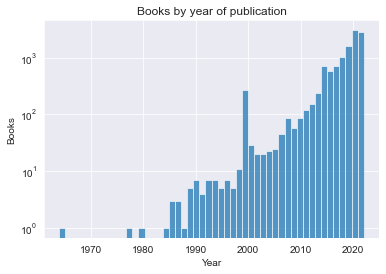

In [53]:
fig, ax = plt.subplots()
ax = sns.histplot(x='anno-pubblicazione', data=df, bins=50)
ax.set_xlabel('Year')
ax.set_ylabel('Books')
ax.set_yscale('log')
ax.set_title('Books by year of publication')
plt.show()

In [54]:
df.drop(columns=['data-di-uscita'], inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11775 entries, 0 to 20498
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   titolo                    11775 non-null  object 
 1   autore                    11775 non-null  object 
 2   editore                   11775 non-null  object 
 3   categoria                 11775 non-null  object 
 4   raccomandazioni-ricevute  11775 non-null  float64
 5   id                        11775 non-null  int64  
 6   anno-pubblicazione        11775 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 994.0+ KB


In [56]:
df

,titolo,autore,editore,categoria,raccomandazioni-ricevute,id,anno-pubblicazione
id,,,,,,,
0,Cambiare l'acqua ai fiori,Perrin Valérie,E/O,Letterature straniere: testi,64.0,0,2019
1,"Ragazza, donna, altro",Evaristo Bernardine,Sur,Letterature straniere: testi,61.0,1,2020
2,L'Ickabog,Rowling J. K.,Salani,Letteratura per ragazzi,44.0,2,2020
3,Dante,Barbero Alessandro,Laterza,Letteratura italiana: critica,37.0,3,2020
4,Borgo Sud,Di Pietrantonio Donatella,Einaudi,Letteratura italiana: testi,36.0,4,2020
...,...,...,...,...,...,...,...
20494,La notte delle ricostruzioni,Donaera Andrea,Tetra,Letteratura italiana: testi,1.0,20494,2022
20495,L'ultimo raccolto,Zardi Paolo,Tetra,Letteratura italiana: testi,1.0,20495,2022
20496,X. Una caccia,Aiolli Valerio,Tetra,Letteratura italiana: testi,1.0,20496,2022


In [57]:
df.to_csv('data/bd-node.csv')